In [228]:
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
import folium
import vaex
import pandas as pd
from math import pi, cos, sin
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

Preprocessing Dataframes for clustering
Clustering triptypes: Duration, Distance, start time, locations 
Clustering Companies: Companies, duration, locations, distance, fares
Clustering Customers: Locations, Tips, Payment types

## Data Preperation

In [208]:
#loading prepared data
df_original = vaex.open('./data/trips_prepared.hdf5')


In [209]:
#make important changes to prepare for clustering
df = df_original.copy()

#add month, weekday, and hour columns
df['month'] = df.trip_start_timestamp.dt.month
df['day'] = df.trip_start_timestamp.dt.dayofweek
df['hour'] = df.trip_start_timestamp.dt.hour



In [210]:
#hour and day need to be recalculated as circular features in order to ensure the correct distances between each hour/day

def circular( dataframe, feature, name, n):
    dataframe[name + '_sin'] = feature.apply(lambda x: sin(2*pi*(x/n)))
    dataframe[name + '_cos'] = feature.apply(lambda x: cos(2*pi*(x/n)))

circular(df, df['day'], 'day', 7)
circular(df, df['hour'], 'hour', 24)


In [221]:
#scaling method for variables that need scaling
scaler = StandardScaler()

def scaling(data):
    scaler.fit(data)
    data_scaled = scaler.transform(data)
    df_data_scaled = pd.DataFrame(data_scaled, columns = data.get_column_names())
    return data_scaled, df_data_scaled

In [224]:
#choose number of clusters for k-means

def k_optimal(data, k_max):
    clusters = []
    losses = []
    for k in range(k_max):
        model= MiniBatchKMeans(n_clusters=k+1,random_state=42,init="k-means++") 
        model.fit(data)
        clusters.append(k+1)
        losses.append(model.inertia_)
    plt.plot(clusters, losses)
        #plt.xlim([2,10])
    plt.ylabel("Loss")
    plt.xlabel("Number of clusters")
    plt.show()

### CLUSTERING 1

In [232]:
#preparing dataframe
features = ['trip_id', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'pickup_census_tract', 'dropoff_census_tract', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'payment_type', 'company', 'pickup_centroid_latitude', 'pickup_centroid_longitude','dropoff_centroid_latitude', 'dropoff_centroid_longitude', 'trip_start_hour',    'trip_end_hour',    'trip_start_4h_period',    'trip_end_4h_period'  ]
df_cluster_one = df.drop(columns = features)
df_cluster_one.head(1)


#,trip_seconds,trip_miles,month,day,hour,day_sin,day_cos,hour_sin,hour_cos
0,240,1.3,1,6,0,-0.781831,0.62349,0,1


In [233]:
#scaling variables that need scaling
features = ['month', 'day', 'hour']

df_cluster_one_scaling = df_cluster_one.drop(columns = features)

cluster_one_scaled, df_cluster_one_scaled =  scaling(df_cluster_one_scaling)

df_cluster_one_scaled = vaex.from_pandas(df_cluster_one_scaled)

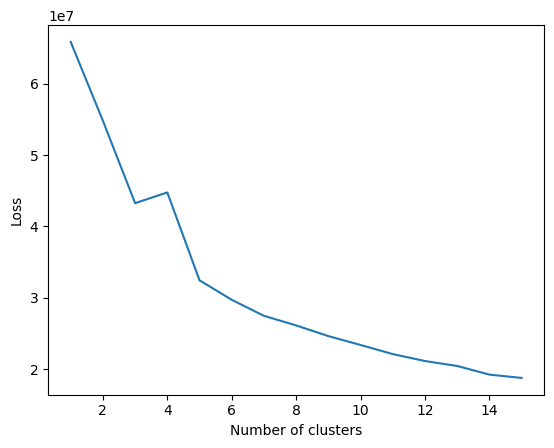

In [225]:
#choose number of clusters for k-means

k_optimal(cluster_one_scaled, 15)

In [341]:
test_df = df_cluster_one_scaled.copy()


In [342]:
# refit algorithm full data

means = MiniBatchKMeans(n_clusters=5, random_state=42,init="k-means++")
means.fit(cluster_one_scaled)

numbers = ['one', 'two', 'three', 'for', 'five']
#add cluster lables to the dataset
test_df["cluster"] = means.predict(cluster_one_scaled)
test_df["cluster"] = test_df["cluster"].apply(lambda x: numbers[x])

df_dummy = df_cluster_one.drop(columns = ['trip_seconds','trip_miles', 'day_sin',	'day_cos',	'hour_sin',	'hour_cos'])
test_df = test_df.join(df_dummy, allow_duplication=True)


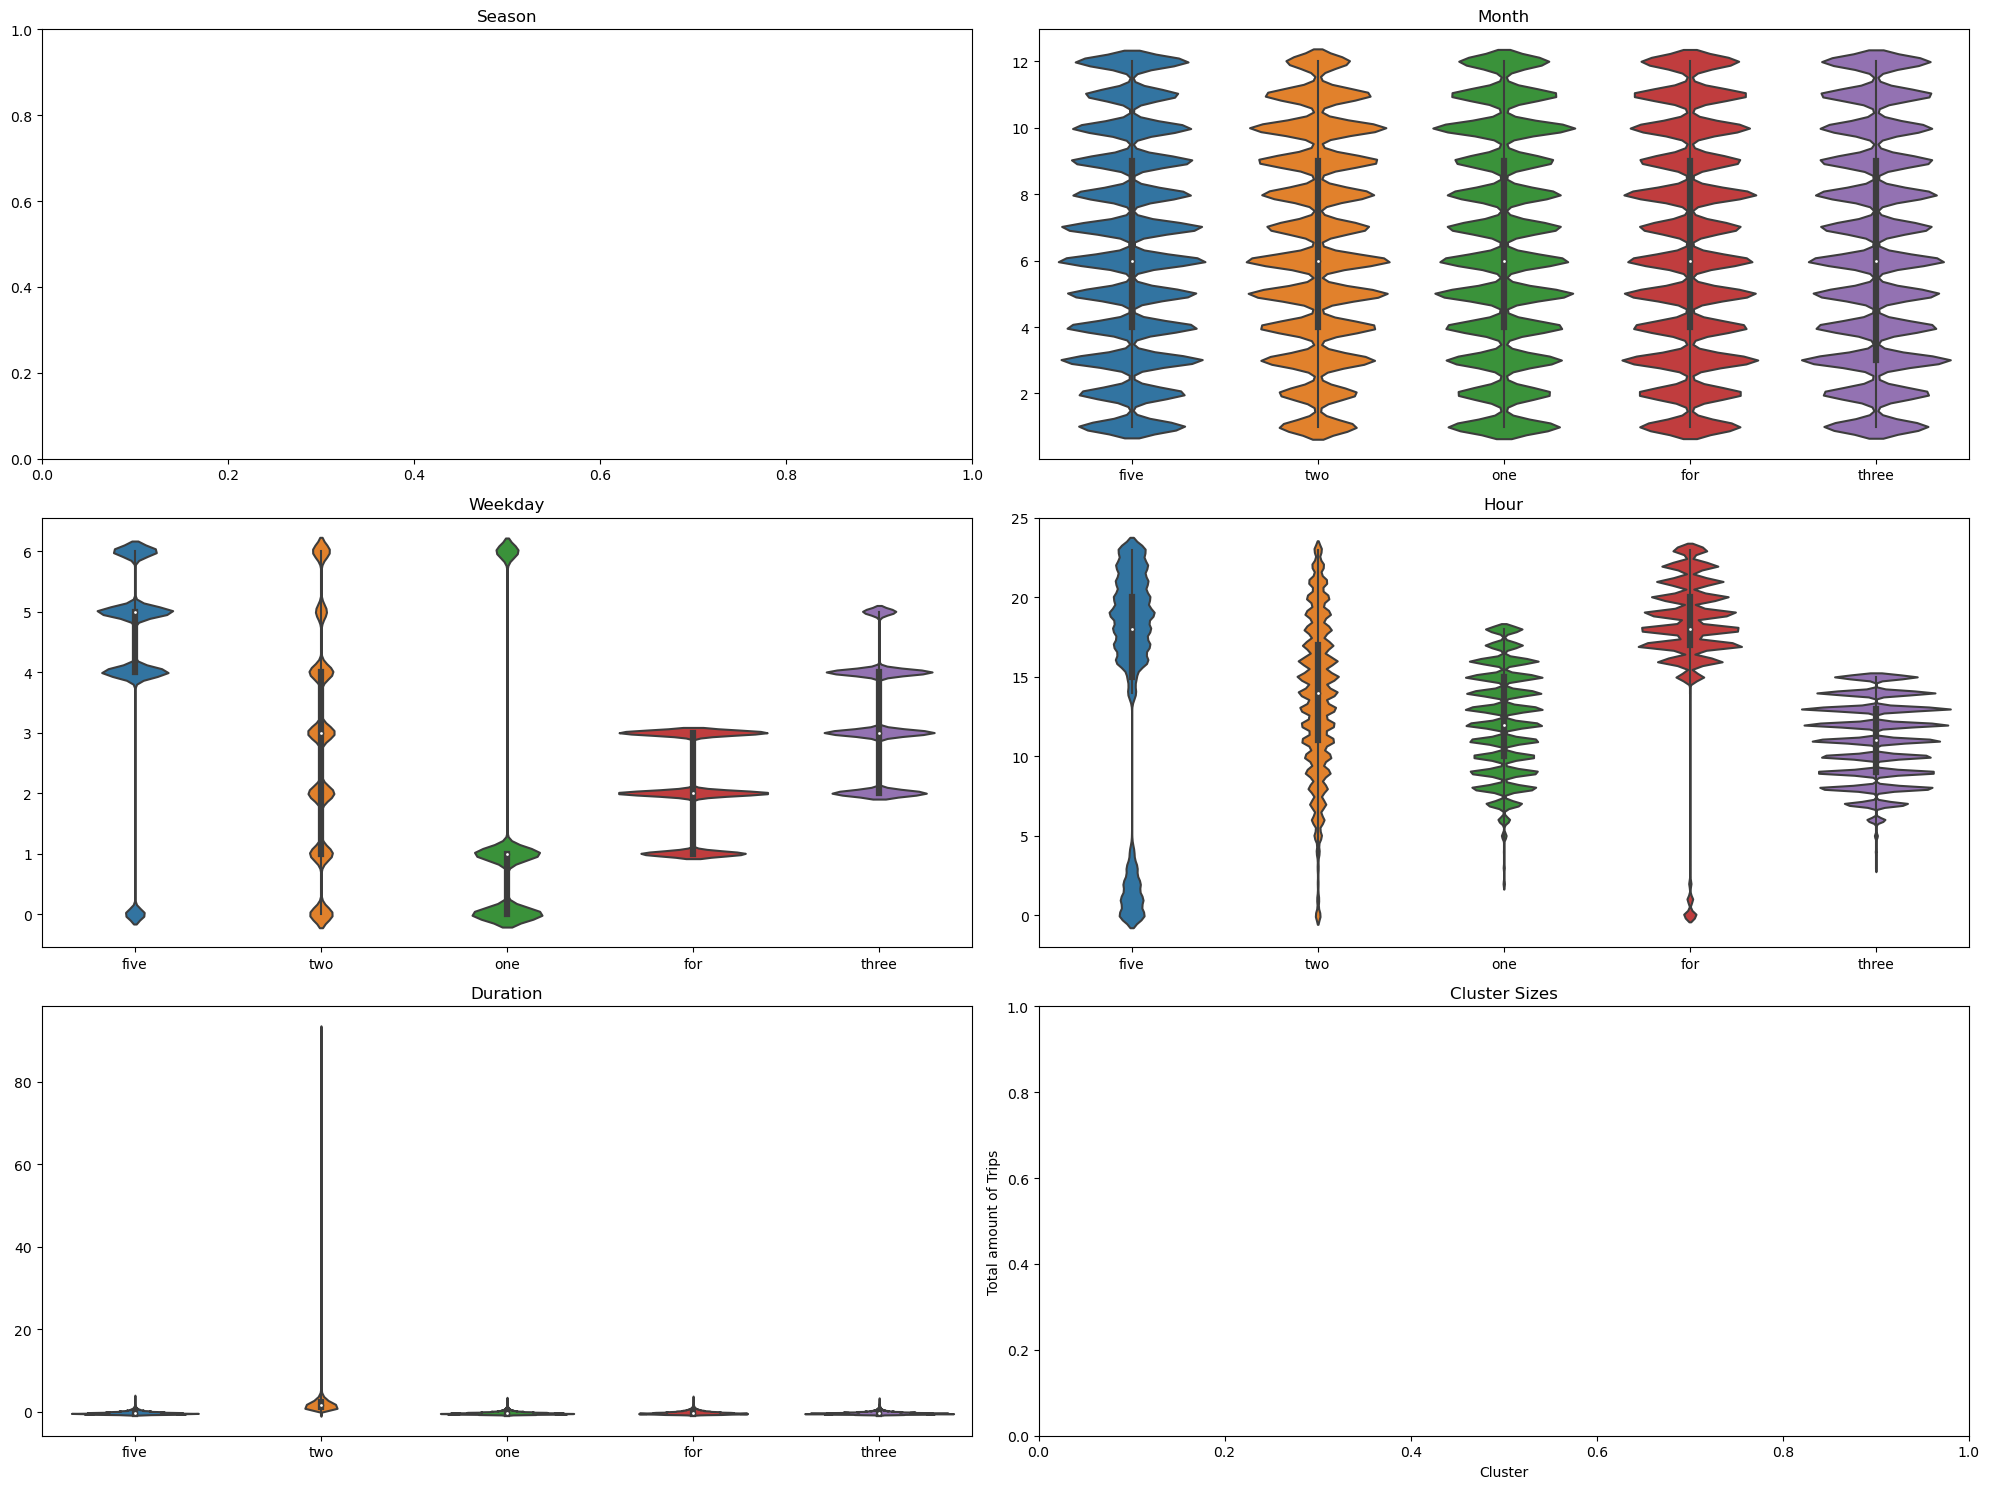

In [344]:
violin_plots, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))


sns.violinplot(ax = axes[0, 1], x=test_df.cluster.values, y=test_df.month.values)
sns.violinplot(ax = axes[1, 0], x=test_df.cluster.values, y=test_df.day.values)
sns.violinplot(ax = axes[1, 1], x=test_df.cluster.values, y=test_df.hour.values)
sns.violinplot(ax = axes[2, 0], x=test_df.cluster.values, y=test_df.trip_seconds.values)

axes[0, 0].set_title('Season'), axes[0, 1].set_title('Month'), axes[1, 0].set_title('Weekday'), axes[1, 1].set_title('Hour')
axes[2, 0].set_title('Duration'), axes[2, 1].set_xlabel('Cluster'), axes[2, 1].set_ylabel('Total amount of Trips'), axes[2, 1].set_title('Cluster Sizes')

violin_plots.tight_layout()
plt.show()

## Custering 2

In [ ]:
#preparing dataframe
features = ['trip_id', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'pickup_census_tract', 'dropoff_census_tract', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'payment_type', 'pickup_centroid_latitude', 'pickup_centroid_longitude','dropoff_centroid_latitude', 'dropoff_centroid_longitude', 'trip_start_hour',    'trip_end_hour',    'trip_start_4h_period',    'trip_end_4h_period'  ]
df_cluster_two = df.drop(columns = features)
df_cluster_two.head(1)

In [ ]:
#scaling variables that need scaling
features = ['month', 'day', 'hour', 'company', ]

df_cluster_one_scaling = df_cluster_one.drop(columns = features)

cluster_one_scaled, df_cluster_one_scaled =  scaling(df_cluster_one_scaling)

df_cluster_one_scaled = vaex.from_pandas(df_cluster_one_scaled)

In [ ]:
#choose number of clusters for k-means

k_optimal(cluster_one_scaled, 15)

In [ ]:
test_df = df_cluster_one_scaled.copy()

In [ ]:
# refit algorithm full data

means = MiniBatchKMeans(n_clusters=5, random_state=42,init="k-means++")
means.fit(cluster_one_scaled)

numbers = ['one', 'two', 'three', 'for', 'five']
#add cluster lables to the dataset
test_df["cluster"] = means.predict(cluster_one_scaled)
test_df["cluster"] = test_df["cluster"].apply(lambda x: numbers[x])

df_dummy = df_cluster_one.drop(columns = ['trip_seconds','trip_miles', 'day_sin',	'day_cos',	'hour_sin',	'hour_cos'])
test_df = test_df.join(df_dummy, allow_duplication=True)

In [ ]:
violin_plots, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))


sns.violinplot(ax = axes[0, 1], x=test_df.cluster.values, y=test_df.month.values)
sns.violinplot(ax = axes[1, 0], x=test_df.cluster.values, y=test_df.day.values)
sns.violinplot(ax = axes[1, 1], x=test_df.cluster.values, y=test_df.hour.values)
sns.violinplot(ax = axes[2, 0], x=test_df.cluster.values, y=test_df.trip_seconds.values)

axes[0, 0].set_title('Season'), axes[0, 1].set_title('Month'), axes[1, 0].set_title('Weekday'), axes[1, 1].set_title('Hour')
axes[2, 0].set_title('Duration'), axes[2, 1].set_xlabel('Cluster'), axes[2, 1].set_ylabel('Total amount of Trips'), axes[2, 1].set_title('Cluster Sizes')

violin_plots.tight_layout()
plt.show()